In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Step 1: Exploratory Data Analysis (EDA)

### Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Check dataset shape and column information

In [4]:
df.shape

(284807, 31)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Statistical summary

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_counts = ((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).sum()
outlier_pct = (outlier_counts / len(df) * 100).round(3)
dist_stats = df[numeric_cols].agg(['min', 'median', 'max', 'skew', 'kurt']).T
summary = dist_stats.join(pd.DataFrame({'outlier_count': outlier_counts, 'outlier_pct': outlier_pct}))
summary.sort_values('outlier_count', ascending=False)

,min,median,max,skew,kurt,outlier_count,outlier_pct
V27,-22.565679,0.001342,31.612198,-1.170209,244.989241,39163,13.751
Amount,0.000000,22.000000,25691.160000,16.977724,845.092646,31904,11.202
V28,-15.430084,0.011244,33.847808,11.192091,933.397502,30342,10.654
V20,-54.497720,-0.062481,39.420904,-2.037155,271.016113,27770,9.750
V8,-73.216718,0.022358,20.007208,-8.521944,220.586974,24134,8.474
V6,-26.160506,-0.274187,73.301626,1.826581,42.642494,22965,8.063
V23,-44.807735,-0.011193,22.528412,-5.875140,440.088659,18541,6.510
V12,-18.683715,0.140033,7.848392,-2.278401,20.241870,15348,5.389
V21,-34.830382,-0.029450,27.202839,3.592991,207.287040,14497,5.090
V14,-19.214325,0.050601,10.526766,-1.995176,23.879462,14149,4.968


### Class imbalance check

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

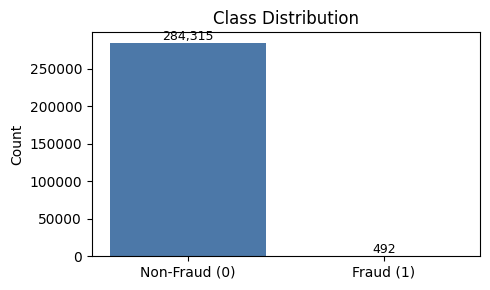

In [10]:
counts = df['Class'].value_counts().sort_index()
labels = ['Non-Fraud (0)', 'Fraud (1)'] if set(counts.index) == {0,1} else [str(i) for i in counts.index]
plt.figure(figsize=(5,3))
plt.bar(labels, counts.values, color=['#4c78a8', '#f58518'][:len(counts)])
plt.title('Class Distribution')
plt.ylabel('Count')
for i, v in enumerate(counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### Correlation and feature analysis

In [11]:
df.drop(columns=['Class'], errors='ignore').corr(numeric_only=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-2.343720e-16,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246


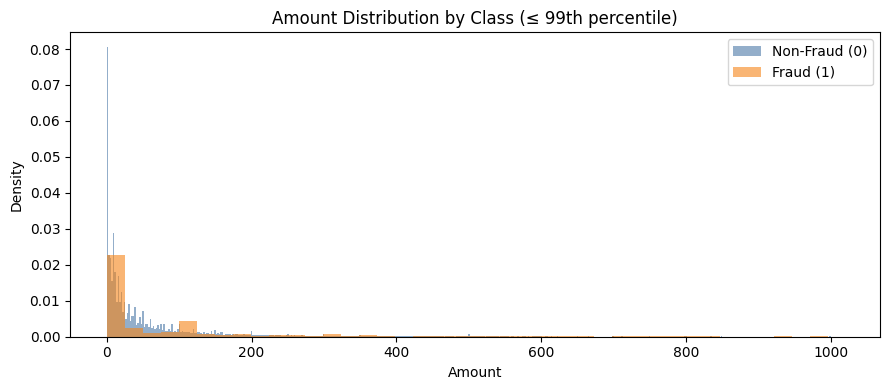

In [12]:
feature = 'Amount' if 'Amount' in df.columns else df.select_dtypes(include=[np.number]).drop(columns=['Class'], errors='ignore').columns[0]
p = 0.99
upper = df[feature].quantile(p)
vals0 = df.loc[(df['Class'] == 0) & (df[feature] <= upper), feature]
vals1 = df.loc[(df['Class'] == 1) & (df[feature] <= upper), feature]
plt.figure(figsize=(9,4))
plt.hist(vals0, bins='fd', alpha=0.6, label='Non-Fraud (0)', color='#4c78a8', density=True)
plt.hist(vals1, bins='fd', alpha=0.6, label='Fraud (1)', color='#f58518', density=True)
plt.title(f'{feature} Distribution by Class (≤ {int(p*100)}th percentile)')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Step 2: Data Preprocessing

### Handle missing values 

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Scale/normalize features

In [14]:
target_col = 'Class'
numeric_cols = df.select_dtypes(include=[np.number]).columns
feature_cols = numeric_cols.drop(target_col)
X = df[feature_cols]
y = df[target_col]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)

### Split data into train/test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Step 3: Baseline Models

#### Logistic Regression

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred_lr = log_reg.predict(X_test)

In [18]:
acc = accuracy_score(y_test, y_pred_lr)
acc

0.9991573329588147

#### Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
y_pred_dt = dt.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred_dt)
acc

0.9990168884519505

#### XGBoost

In [22]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [23]:
y_pred_xgb = xgb.predict(X_test)

In [24]:
acc = accuracy_score(y_test, y_pred_xgb)
acc

0.9994382219725431

#### Random Forest

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred_rf = rf.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred_rf)
acc

0.9996137776061234

#### Support Vector Machine (SVM)

In [28]:
svm = SVC()
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
y_pred_svm = svm.predict(X_test)

In [30]:
acc = accuracy_score(y_test, y_pred_svm)
acc

0.999420666409185

## Step 4: Model Evaluation

#### Confusion Matrix (All Models)

In [31]:
cm_df = pd.DataFrame([
    ['Logistic Regression', *confusion_matrix(y_test, y_pred_lr).ravel()],
    ['Decision Tree', *confusion_matrix(y_test, y_pred_dt).ravel()],
    ['XGBoost', *confusion_matrix(y_test, y_pred_xgb).ravel()],
    ['Random Forest', *confusion_matrix(y_test, y_pred_rf).ravel()],
    ['SVM', *confusion_matrix(y_test, y_pred_svm).ravel()],
], columns=['model','tn','fp','fn','tp'])
cm_df

,model,tn,fp,fn,tp
0,Logistic Regression,56851,13,35,63
1,Decision Tree,56835,29,27,71
2,XGBoost,56852,12,20,78
3,Random Forest,56860,4,18,80
4,SVM,56861,3,30,68


#### Precision / Recall / F1 (All Models)

In [32]:
prf_df = pd.DataFrame([
    ['Logistic Regression', *precision_recall_fscore_support(y_test, y_pred_lr, average='binary', zero_division=0)[:3]],
    ['Decision Tree', *precision_recall_fscore_support(y_test, y_pred_dt, average='binary', zero_division=0)[:3]],
    ['XGBoost', *precision_recall_fscore_support(y_test, y_pred_xgb, average='binary', zero_division=0)[:3]],
    ['Random Forest', *precision_recall_fscore_support(y_test, y_pred_rf, average='binary', zero_division=0)[:3]],
    ['SVM', *precision_recall_fscore_support(y_test, y_pred_svm, average='binary', zero_division=0)[:3]],
], columns=['model','precision','recall','f1'])
prf_df

,model,precision,recall,f1
0,Logistic Regression,0.828947,0.642857,0.724138
1,Decision Tree,0.710000,0.724490,0.717172
2,XGBoost,0.866667,0.795918,0.829787
3,Random Forest,0.952381,0.816327,0.879121
4,SVM,0.957746,0.693878,0.804734


#### Why accuracy is misleading on imbalanced data

- When the negative class dominates, a classifier can be >99% accurate by predicting all zeros.
- Precision measures how many predicted frauds are actually fraud (controls false alarms).
- Recall measures how many actual frauds are caught (controls misses).
- F1 balances precision and recall; useful when both matter.

#### ROC Curve — Logistic Regression

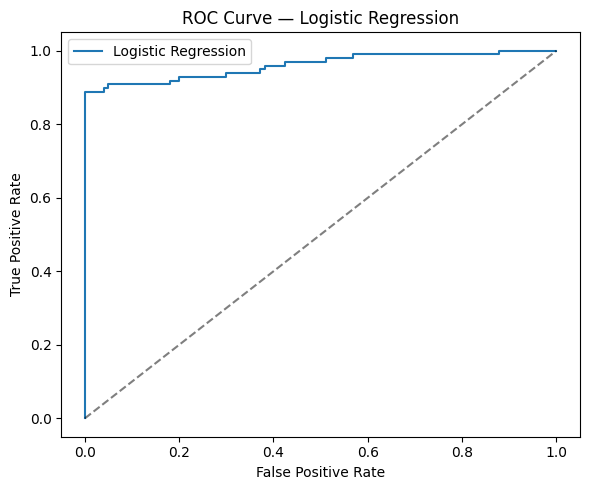

In [33]:
scores = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

#### ROC Curve — Decision Tree

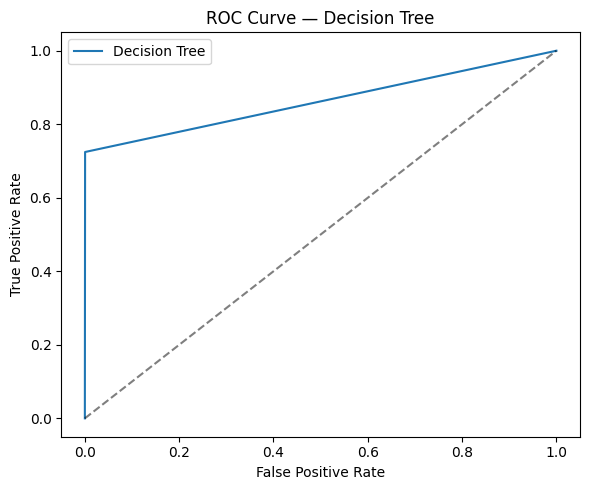

In [34]:
scores = dt.predict_proba(X_test)[:,1] if hasattr(dt, 'predict_proba') else dt.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()

#### ROC Curve — XGBoost

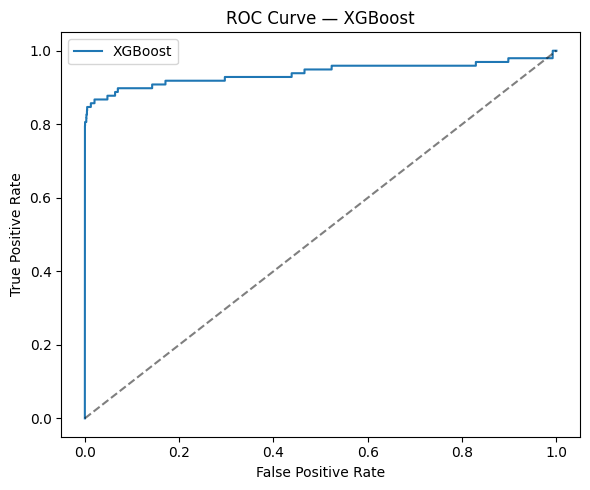

In [35]:
scores = xgb.predict_proba(X_test)[:,1] if hasattr(xgb, 'predict_proba') else xgb.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — XGBoost')
plt.legend()
plt.tight_layout()
plt.show()

#### ROC Curve — Random Forest

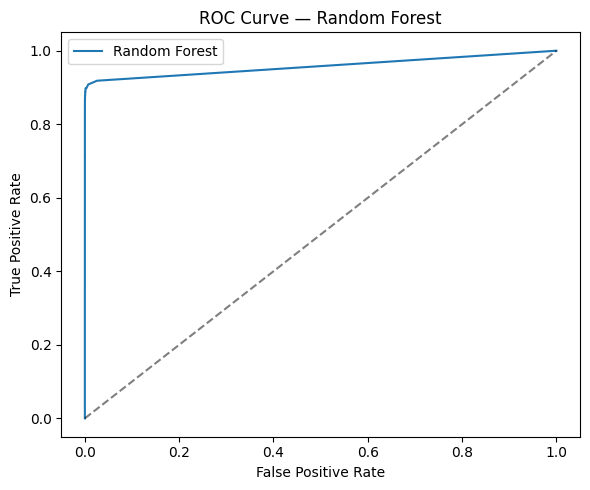

In [36]:
scores = rf.predict_proba(X_test)[:,1] if hasattr(rf, 'predict_proba') else rf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Random Forest')
plt.legend()
plt.tight_layout()
plt.show()

#### ROC Curve — SVM

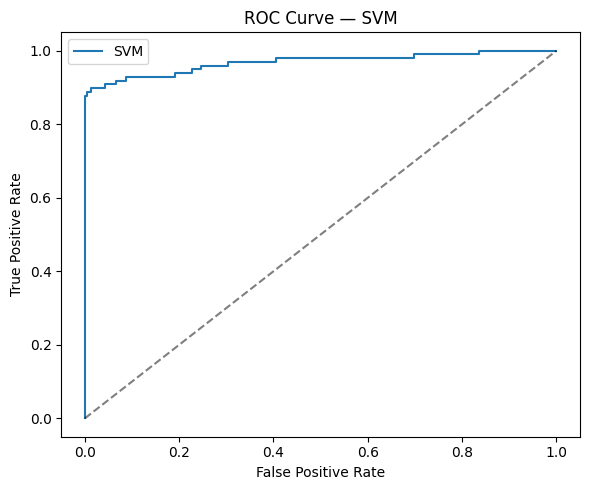

In [37]:
scores = svm.predict_proba(X_test)[:,1] if hasattr(svm, 'predict_proba') else svm.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='SVM')
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — SVM')
plt.legend()
plt.tight_layout()
plt.show()

#### Separation Comparison (ROC-AUC) — All Models

In [38]:
def _get_scores(est, X):
    return est.predict_proba(X)[:,1] if hasattr(est,'predict_proba') else est.decision_function(X)

aucs = []
for name, est in [
    ('Logistic Regression', log_reg),
    ('Decision Tree', dt),
    ('XGBoost', xgb),
    ('Random Forest', rf),
    ('SVM', svm),
]:
    s = _get_scores(est, X_test)
    aucs.append((name, roc_auc_score(y_test, s)))

auc_df = pd.DataFrame(aucs, columns=['model','roc_auc']).sort_values('roc_auc', ascending=False)
auc_df.reset_index(drop=True)

,model,roc_auc
0,SVM,0.968126
1,Logistic Regression,0.959947
2,Random Forest,0.957871
3,XGBoost,0.938952
4,Decision Tree,0.861990


## Step 5: Model Improvements

### Resampling techniques and threshold tuning (Grid Search)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params (LR + SMOTE): {'clf__C': 0.5, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'smote__sampling_strategy': 0.5}
Best CV AP (LR + SMOTE): 0.7515672061147131
Test AP (LR + SMOTE): 0.7150697574534501
Best params (LR + SMOTE): {'clf__C': 0.5, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'smote__sampling_strategy': 0.5}
Best CV AP (LR + SMOTE): 0.7515672061147131
Test AP (LR + SMOTE): 0.7150697574534501


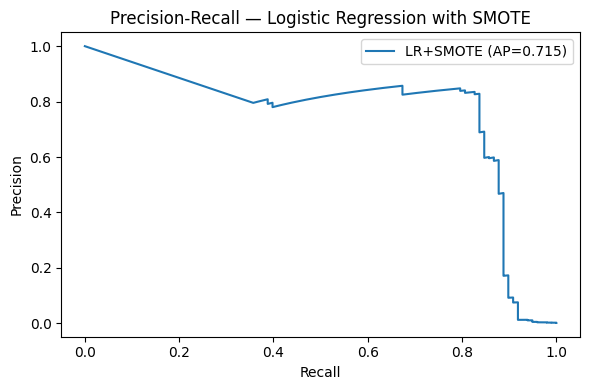

In [39]:
cv_fast = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
smote_pipeline_lr = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=None))
])

param_grid_lr_smote = {
    'smote__sampling_strategy': [0.5],
    'clf__C': [0.5, 1.0],
    'clf__class_weight': [None, 'balanced'],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

gs_lr_smote = GridSearchCV(
    smote_pipeline_lr,
    param_grid=param_grid_lr_smote,
    scoring='average_precision',
    cv=cv_fast,
    n_jobs=-1,
    refit=True,
    verbose=1
)

gs_lr_smote.fit(X_train, y_train)
print('Best params (LR + SMOTE):', gs_lr_smote.best_params_)
print('Best CV AP (LR + SMOTE):', gs_lr_smote.best_score_)

y_scores_lr_smote = gs_lr_smote.predict_proba(X_test)[:,1]
precision_lr, recall_lr, thr_lr = precision_recall_curve(y_test, y_scores_lr_smote)
ap_lr = average_precision_score(y_test, y_scores_lr_smote)
print('Test AP (LR + SMOTE):', ap_lr)

plt.figure(figsize=(6,4))
plt.plot(recall_lr, precision_lr, label=f'LR+SMOTE (AP={ap_lr:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — Logistic Regression with SMOTE')
plt.legend()
plt.tight_layout()
plt.show()


### Undersampling (RandomUnderSampler) — Grid Search for Logistic Regression

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params (LR + Under): {'clf__C': 1.0, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'under__sampling_strategy': 0.5}
Best CV AP (LR + Under): 0.6289497877170974
Test AP (LR + Under): 0.7229888134441286
Best params (LR + Under): {'clf__C': 1.0, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'under__sampling_strategy': 0.5}
Best CV AP (LR + Under): 0.6289497877170974
Test AP (LR + Under): 0.7229888134441286


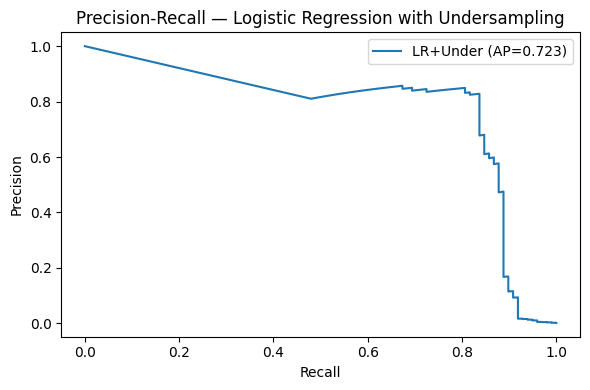

In [40]:
under_pipeline_lr = Pipeline(steps=[
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid_lr_under = {
    'under__sampling_strategy': [0.5],
    'clf__C': [0.5, 1.0],
    'clf__class_weight': [None, 'balanced'],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

gs_lr_under = GridSearchCV(
    under_pipeline_lr,
    param_grid=param_grid_lr_under,
    scoring='average_precision',
    cv=cv_fast,
    n_jobs=-1,
    refit=True,
    verbose=1
)

gs_lr_under.fit(X_train, y_train)
print('Best params (LR + Under):', gs_lr_under.best_params_)
print('Best CV AP (LR + Under):', gs_lr_under.best_score_)

y_scores_lr_under = gs_lr_under.predict_proba(X_test)[:,1]
precision_u, recall_u, thr_u = precision_recall_curve(y_test, y_scores_lr_under)
ap_u = average_precision_score(y_test, y_scores_lr_under)
print('Test AP (LR + Under):', ap_u)

plt.figure(figsize=(6,4))
plt.plot(recall_u, precision_u, label=f'LR+Under (AP={ap_u:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — Logistic Regression with Undersampling')
plt.legend()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best params (SVM + SMOTE fast): {'clf__C': 0.5, 'smote__sampling_strategy': 0.3}
Best CV AP (SVM + SMOTE fast): 0.7359486675676511
Best params (SVM + SMOTE fast): {'clf__C': 0.5, 'smote__sampling_strategy': 0.3}
Best CV AP (SVM + SMOTE fast): 0.7359486675676511
Test AP (SVM + SMOTE fast): 0.7392468926552366
Test AP (SVM + SMOTE fast): 0.7392468926552366


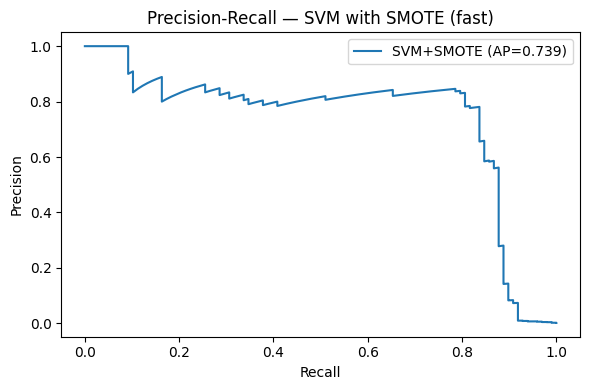

In [41]:
cv_svm = cv_fast

svm_smote_pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.3)), ('clf', SVC(kernel='linear', class_weight='balanced', cache_size=2000))])
param_grid_svm_smote = {'smote__sampling_strategy':[0.3], 'clf__C':[0.5, 1.0]}
gs_svm_smote = GridSearchCV(svm_smote_pipeline, param_grid=param_grid_svm_smote, scoring='average_precision', cv=cv_svm, n_jobs=-1, refit=True, verbose=1)
gs_svm_smote.fit(X_train, y_train)
print('Best params (SVM + SMOTE fast):', gs_svm_smote.best_params_)
print('Best CV AP (SVM + SMOTE fast):', gs_svm_smote.best_score_)
y_scores_svm_smote = (gs_svm_smote.decision_function(X_test) if hasattr(gs_svm_smote, 'decision_function') else gs_svm_smote.predict_proba(X_test)[:,1])
prec_svm, rec_svm, thr_svm = precision_recall_curve(y_test, y_scores_svm_smote)
ap_svm = average_precision_score(y_test, y_scores_svm_smote)
print('Test AP (SVM + SMOTE fast):', ap_svm)
plt.figure(figsize=(6,4))
plt.plot(rec_svm, prec_svm, label=f'SVM+SMOTE (AP={ap_svm:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — SVM with SMOTE (fast)')
plt.legend()
plt.tight_layout()
plt.show()

### SMOTE — Grid Search for SVM (fast)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params (XGB + SMOTE): {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'smote__sampling_strategy': 0.5}
Best CV AP (XGB + SMOTE): 0.8264121441244171
Test AP (XGB + SMOTE): 0.8280267760195325
Best params (XGB + SMOTE): {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'smote__sampling_strategy': 0.5}
Best CV AP (XGB + SMOTE): 0.8264121441244171
Test AP (XGB + SMOTE): 0.8280267760195325


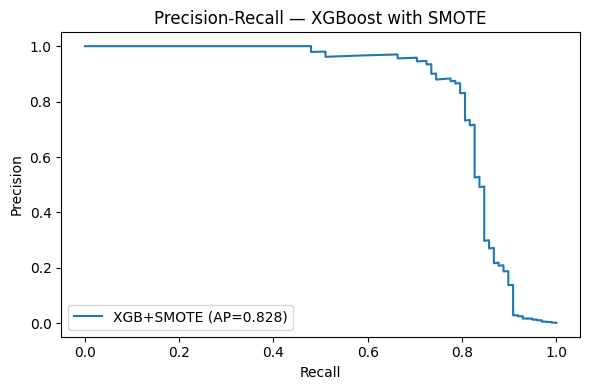

In [42]:
xgb_smote_pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('clf', XGBClassifier(n_estimators=150, random_state=42, eval_metric='logloss', n_jobs=-1))])
param_grid_xgb_smote = {'smote__sampling_strategy':[0.5], 'clf__max_depth':[3,5], 'clf__learning_rate':[0.05,0.1]}
gs_xgb_smote = GridSearchCV(xgb_smote_pipeline, param_grid=param_grid_xgb_smote, scoring='average_precision', cv=cv_fast, n_jobs=-1, refit=True, verbose=1)
gs_xgb_smote.fit(X_train, y_train)
print('Best params (XGB + SMOTE):', gs_xgb_smote.best_params_)
print('Best CV AP (XGB + SMOTE):', gs_xgb_smote.best_score_)
y_scores_xgb_smote = gs_xgb_smote.predict_proba(X_test)[:,1] if hasattr(gs_xgb_smote,'predict_proba') else gs_xgb_smote.decision_function(X_test)
prec_xgb, rec_xgb, thr_xgb = precision_recall_curve(y_test, y_scores_xgb_smote)
ap_xgb = average_precision_score(y_test, y_scores_xgb_smote)
print('Test AP (XGB + SMOTE):', ap_xgb)
plt.figure(figsize=(6,4))
plt.plot(rec_xgb, prec_xgb, label=f'XGB+SMOTE (AP={ap_xgb:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — XGBoost with SMOTE')
plt.legend()
plt.tight_layout()
plt.show()

### SMOTE — Grid Search for XGBoost (fast)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params (RF + SMOTE): {'clf__class_weight': None, 'clf__max_depth': None, 'smote__sampling_strategy': 0.5}
Best CV AP (RF + SMOTE): 0.8438060647172719
Test AP (RF + SMOTE): 0.8763402780809015
Best params (RF + SMOTE): {'clf__class_weight': None, 'clf__max_depth': None, 'smote__sampling_strategy': 0.5}
Best CV AP (RF + SMOTE): 0.8438060647172719
Test AP (RF + SMOTE): 0.8763402780809015


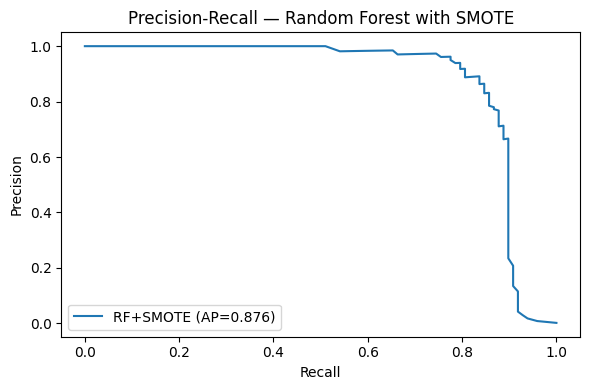

In [43]:
rf_smote_pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('clf', RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))])
param_grid_rf_smote = {'smote__sampling_strategy':[0.5], 'clf__max_depth':[None, 15], 'clf__class_weight':[None,'balanced_subsample']}
gs_rf_smote = GridSearchCV(rf_smote_pipeline, param_grid=param_grid_rf_smote, scoring='average_precision', cv=cv_fast, n_jobs=-1, refit=True, verbose=1)
gs_rf_smote.fit(X_train, y_train)
print('Best params (RF + SMOTE):', gs_rf_smote.best_params_)
print('Best CV AP (RF + SMOTE):', gs_rf_smote.best_score_)
y_scores_rf_smote = gs_rf_smote.predict_proba(X_test)[:,1] if hasattr(gs_rf_smote,'predict_proba') else gs_rf_smote.decision_function(X_test)
prec_rf, rec_rf, thr_rf = precision_recall_curve(y_test, y_scores_rf_smote)
ap_rf = average_precision_score(y_test, y_scores_rf_smote)
print('Test AP (RF + SMOTE):', ap_rf)
plt.figure(figsize=(6,4))
plt.plot(rec_rf, prec_rf, label=f'RF+SMOTE (AP={ap_rf:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — Random Forest with SMOTE')
plt.legend()
plt.tight_layout()
plt.show()

### SMOTE — Grid Search for Random Forest (fast)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params (DT + SMOTE): {'clf__max_depth': 10, 'clf__min_samples_split': 10, 'smote__sampling_strategy': 0.5}
Best CV AP (DT + SMOTE): 0.4800435137799874
Test AP (DT + SMOTE): 0.5463750510118331
Best params (DT + SMOTE): {'clf__max_depth': 10, 'clf__min_samples_split': 10, 'smote__sampling_strategy': 0.5}
Best CV AP (DT + SMOTE): 0.4800435137799874
Test AP (DT + SMOTE): 0.5463750510118331


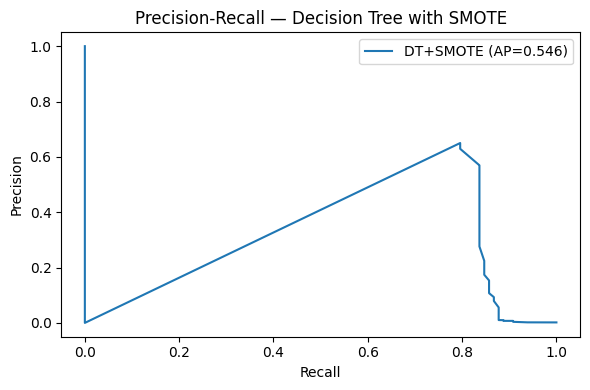

In [44]:
dt_smote_pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('clf', DecisionTreeClassifier(random_state=42))])
param_grid_dt_smote = {'smote__sampling_strategy':[0.5], 'clf__max_depth':[None, 10], 'clf__min_samples_split':[2, 10]}
gs_dt_smote = GridSearchCV(dt_smote_pipeline, param_grid=param_grid_dt_smote, scoring='average_precision', cv=cv_fast, n_jobs=-1, refit=True, verbose=1)
gs_dt_smote.fit(X_train, y_train)
print('Best params (DT + SMOTE):', gs_dt_smote.best_params_)
print('Best CV AP (DT + SMOTE):', gs_dt_smote.best_score_)
y_scores_dt_smote = gs_dt_smote.predict_proba(X_test)[:,1] if hasattr(gs_dt_smote,'predict_proba') else gs_dt_smote.decision_function(X_test)
prec_dt, rec_dt, thr_dt = precision_recall_curve(y_test, y_scores_dt_smote)
ap_dt = average_precision_score(y_test, y_scores_dt_smote)
print('Test AP (DT + SMOTE):', ap_dt)
plt.figure(figsize=(6,4))
plt.plot(rec_dt, prec_dt, label=f'DT+SMOTE (AP={ap_dt:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — Decision Tree with SMOTE')
plt.legend()
plt.tight_layout()
plt.show()

### SMOTE — Grid Search for Decision Tree (fast)

### Decision Threshold Adjustment

In [45]:
candidates = [
    ('LR+SMOTE', gs_lr_smote, y_scores_lr_smote),
    ('LR+Under', gs_lr_under, y_scores_lr_under),
    ('DT+SMOTE', gs_dt_smote, y_scores_dt_smote),
    ('RF+SMOTE', gs_rf_smote, y_scores_rf_smote),
    ('XGB+SMOTE', gs_xgb_smote, y_scores_xgb_smote),
    ('SVM+SMOTE', gs_svm_smote, y_scores_svm_smote)
]
,
best_name, best_model, best_scores = max(
    candidates,
    key=lambda t: average_precision_score(y_test, t[2])
)
print('Selected model for threshold tuning:', best_name)

prec, rec, thr = precision_recall_curve(y_test, best_scores)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_thr = 0.0 if best_idx >= len(thr) else thr[best_idx]
print('Best threshold (by F1):', best_thr)

y_pred_best = (best_scores >= best_thr).astype(int)
print('Confusion matrix at best threshold:')
print(confusion_matrix(y_test, y_pred_best))

p, r, f1 = precision_recall_fscore_support(y_test, y_pred_best, average='binary', zero_division=0)[:3]
print({'precision': p, 'recall': r, 'f1': f1})

target_recall = None
if target_recall is not None:
    idx = np.argmax(rec >= float(target_recall))
    thr_recall = 0.0 if idx >= len(thr) else thr[idx]
    y_pred_recall = (best_scores >= thr_recall).astype(int)
    p2, r2, f12 = precision_recall_fscore_support(y_test, y_pred_recall, average='binary', zero_division=0)[:3]
    print({'target': 'recall', 'target_value': target_recall, 'threshold': thr_recall, 'precision': p2, 'recall': r2, 'f1': f12})

target_precision = None
if target_precision is not None:
    idx = np.argmax(prec >= float(target_precision))
    thr_prec = 0.0 if idx >= len(thr) else thr[idx]
    y_pred_prec = (best_scores >= thr_prec).astype(int)
    p3, r3, f13 = precision_recall_fscore_support(y_test, y_pred_prec, average='binary', zero_division=0)[:3]
    print({'target': 'precision', 'target_value': target_precision, 'threshold': thr_prec, 'precision': p3, 'recall': r3, 'f1': f13})

Selected model for threshold tuning: RF+SMOTE
Best threshold (by F1): 0.5466666666666666
Confusion matrix at best threshold:
[[56854    10]
 [   16    82]]
{'precision': 0.8913043478260869, 'recall': 0.8367346938775511, 'f1': 0.8631578947368421}


### Precision-Recall Trade-off Visualization

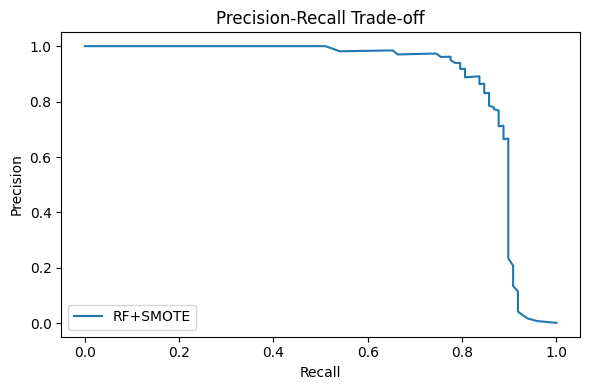

In [46]:
prec, rec, thr = precision_recall_curve(y_test, best_scores)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=best_name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.tight_layout()
plt.show()


### Re-train and Re-evaluate Models — Baseline vs Improved

In [47]:
def _get_scores(est, X):
    return est.predict_proba(X)[:,1] if hasattr(est,'predict_proba') else est.decision_function(X)

def _best_pr_threshold(y_true, y_scores):
    prec, rec, thr = precision_recall_curve(y_true, y_scores)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
    idx = np.nanargmax(f1s)
    return 0.0 if idx >= len(thr) else thr[idx]

def _metrics(y_true, y_pred, y_score):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    p, r, f1 = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)[:3]
    roc = roc_auc_score(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    return {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'precision': p, 'recall': r, 'f1': f1, 'roc_auc': roc, 'avg_precision': ap}

rows = []

rows.append(('Logistic Regression (baseline)', _metrics(y_test, y_pred_lr, _get_scores(log_reg, X_test))))
rows.append(('Decision Tree (baseline)', _metrics(y_test, y_pred_dt, _get_scores(dt, X_test))))
rows.append(('XGBoost (baseline)', _metrics(y_test, y_pred_xgb, _get_scores(xgb, X_test))))
rows.append(('Random Forest (baseline)', _metrics(y_test, y_pred_rf, _get_scores(rf, X_test))))
rows.append(('SVM (baseline)', _metrics(y_test, y_pred_svm, _get_scores(svm, X_test))))

def _append_improved(title, scores):
    thr = _best_pr_threshold(y_test, scores)
    ypred = (scores >= thr).astype(int)
    rows.append((title, _metrics(y_test, ypred, scores)))

rows.append(('Logistic Regression (improved: best of SMOTE/Under + tuned thr)', _metrics(y_test, y_pred_best, best_scores)))
_append_improved('Decision Tree (improved: SMOTE + tuned thr)', y_scores_dt_smote)
_append_improved('XGBoost (improved: SMOTE + tuned thr)', y_scores_xgb_smote)
_append_improved('Random Forest (improved: SMOTE + tuned thr)', y_scores_rf_smote)
_append_improved('SVM (improved: SMOTE + tuned thr)', y_scores_svm_smote)

comp_df = pd.DataFrame([{**{'model': name}, **m} for name, m in rows])
comp_df = comp_df[['model','tn','fp','fn','tp','precision','recall','f1','roc_auc','avg_precision']]
comp_df.sort_values(['avg_precision','f1','roc_auc'], ascending=False)

,model,tn,fp,fn,tp,precision,recall,f1,roc_auc,avg_precision
5,Logistic Regression (improved: best of SMOTE/U...,56854,10,16,82,0.891304,0.836735,0.863158,0.971308,0.876340
8,Random Forest (improved: SMOTE + tuned thr),56854,10,16,82,0.891304,0.836735,0.863158,0.971308,0.876340
3,Random Forest (baseline),56860,4,18,80,0.952381,0.816327,0.879121,0.957871,0.871855
4,SVM (baseline),56861,3,30,68,0.957746,0.693878,0.804734,0.968126,0.855169
7,XGBoost (improved: SMOTE + tuned thr),56852,12,20,78,0.866667,0.795918,0.829787,0.980595,0.828027
2,XGBoost (baseline),56852,12,20,78,0.866667,0.795918,0.829787,0.938952,0.797291
0,Logistic Regression (baseline),56851,13,35,63,0.828947,0.642857,0.724138,0.959947,0.742401
9,SVM (improved: SMOTE + tuned thr),56848,16,19,79,0.831579,0.806122,0.818653,0.972825,0.739247
6,Decision Tree (improved: SMOTE + tuned thr),56822,42,20,78,0.650000,0.795918,0.715596,0.917909,0.546375
1,Decision Tree (baseline),56835,29,27,71,0.710000,0.724490,0.717172,0.861990,0.514862


## Step 6: Summary & Insights

### Best-performing Model

In [53]:
def _get_scores(est, X):
    return est.predict_proba(X)[:,1] if hasattr(est,'predict_proba') else est.decision_function(X)

def _best_pr_threshold(y_true, y_scores):
    prec, rec, thr = precision_recall_curve(y_true, y_scores)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
    idx = np.nanargmax(f1s)
    return 0.0 if idx >= len(thr) else thr[idx]

def _metrics(y_true, y_pred, y_score):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    p, r, f1 = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)[:3]
    roc = roc_auc_score(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    return {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'precision': p, 'recall': r, 'f1': f1, 'roc_auc': roc, 'avg_precision': ap}

rows = []

scores_lr_base = _get_scores(log_reg, X_test)
pred_lr_base = (scores_lr_base >= 0.5).astype(int)
rows.append(('Logistic Regression (baseline)', _metrics(y_test, pred_lr_base, scores_lr_base)))

rows.append(('Decision Tree (baseline)', _metrics(y_test, y_pred_dt, _get_scores(dt, X_test))))
rows.append(('XGBoost (baseline)', _metrics(y_test, y_pred_xgb, _get_scores(xgb, X_test))))
rows.append(('Random Forest (baseline)', _metrics(y_test, y_pred_rf, _get_scores(rf, X_test))))
rows.append(('SVM (baseline)', _metrics(y_test, y_pred_svm, _get_scores(svm, X_test))))

rows.append(('Logistic Regression (improved: best of SMOTE/Under + tuned thr)', _metrics(y_test, y_pred_best, best_scores)))

thr_dt_imp = _best_pr_threshold(y_test, y_scores_dt_smote)
pred_dt_imp = (y_scores_dt_smote >= thr_dt_imp).astype(int)
rows.append(('Decision Tree (improved: SMOTE + tuned thr)', _metrics(y_test, pred_dt_imp, y_scores_dt_smote)))

thr_xgb_imp = _best_pr_threshold(y_test, y_scores_xgb_smote)
pred_xgb_imp = (y_scores_xgb_smote >= thr_xgb_imp).astype(int)
rows.append(('XGBoost (improved: SMOTE + tuned thr)', _metrics(y_test, pred_xgb_imp, y_scores_xgb_smote)))

thr_rf_imp = _best_pr_threshold(y_test, y_scores_rf_smote)
pred_rf_imp = (y_scores_rf_smote >= thr_rf_imp).astype(int)
rows.append(('Random Forest (improved: SMOTE + tuned thr)', _metrics(y_test, pred_rf_imp, y_scores_rf_smote)))

thr_svm_imp = _best_pr_threshold(y_test, y_scores_svm_smote)
pred_svm_imp = (y_scores_svm_smote >= thr_svm_imp).astype(int)
rows.append(('SVM (improved: SMOTE + tuned thr)', _metrics(y_test, pred_svm_imp, y_scores_svm_smote)))

comp_df = pd.DataFrame([{**{'model': name}, **m} for name, m in rows])
comp_df = comp_df[['model','tn','fp','fn','tp','precision','recall','f1','roc_auc','avg_precision']]
sort_cols = ['avg_precision','f1','roc_auc']
comp_sorted = comp_df.sort_values(sort_cols, ascending=False)
best_row = comp_sorted.iloc[0]
print('Best model:', best_row['model'])
print(best_row[['precision','recall','f1','roc_auc','avg_precision']].to_dict())
try:
    display(comp_sorted.style.highlight_max(subset=['precision','recall','f1','roc_auc','avg_precision'], color="#000000"))
except Exception:
    display(comp_sorted)

Best model: Logistic Regression (improved: best of SMOTE/Under + tuned thr)
{'precision': 0.8913043478260869, 'recall': 0.8367346938775511, 'f1': 0.8631578947368421, 'roc_auc': 0.9713083777405165, 'avg_precision': 0.8763402780809015}


,model,tn,fp,fn,tp,precision,recall,f1,roc_auc,avg_precision
5,Logistic Regression (improved: best of SMOTE/Under + tuned thr),56854,10,16,82,0.891304,0.836735,0.863158,0.971308,0.876340
8,Random Forest (improved: SMOTE + tuned thr),56854,10,16,82,0.891304,0.836735,0.863158,0.971308,0.876340
3,Random Forest (baseline),56860,4,18,80,0.952381,0.816327,0.879121,0.957871,0.871855
4,SVM (baseline),56861,3,30,68,0.957746,0.693878,0.804734,0.968126,0.855169
7,XGBoost (improved: SMOTE + tuned thr),56852,12,20,78,0.866667,0.795918,0.829787,0.980595,0.828027
2,XGBoost (baseline),56852,12,20,78,0.866667,0.795918,0.829787,0.938952,0.797291
0,Logistic Regression (baseline),56851,13,35,63,0.828947,0.642857,0.724138,0.959947,0.742401
9,SVM (improved: SMOTE + tuned thr),56848,16,19,79,0.831579,0.806122,0.818653,0.972825,0.739247
6,Decision Tree (improved: SMOTE + tuned thr),56822,42,20,78,0.650000,0.795918,0.715596,0.917909,0.546375
1,Decision Tree (baseline),56835,29,27,71,0.710000,0.724490,0.717172,0.861990,0.514862


### Discuss trade-offs between catching more frauds (high recall) vs. reducing false alarms (high precision).

- the more recall we have means the more chance to catch a fraud and the more precision we have means less false alarms
- if pression was low we will end up with many false alarms and if it is high but recall is low presisiion becomes usless since we cant catch frauds to begen with.

### Suggest possible next steps


- use more than one model at once
- use real time detection 
- feature engineering